In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# Generate synthetic data
N = 10000
# Zeros form a Gaussian centered at (-1, -1)
# epsilon is .1
x_zeros = np.random.multivariate_normal(mean=np.array((5, 5)), cov=1.1*np.eye(2), size=(int(N/2),))
y_zeros = np.zeros((int(N/2),))
# Ones form a Gaussian centered at (1, 1)
# epsilon is .1
x_ones = np.random.multivariate_normal(
    mean=np.array((2, 2)), cov=1.1*np.eye(2), size=(int(N/2),))
y_ones = np.ones((int(N/2),))
x_np_cluster = np.vstack([x_zeros, x_ones])
y_np_cluster = np.concatenate([y_zeros, y_ones])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    y_np_cluster = sess.run(tf.random_shuffle(y_np_cluster))


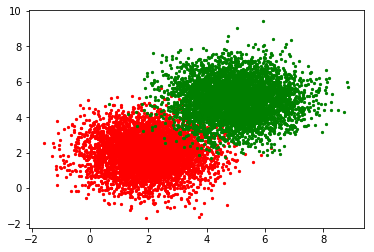

In [2]:
plt.scatter(np.reshape(x_ones, (2, int(N/2)))[0], np.reshape(x_ones, (2, int(N/2)))[1], s = 5, c='r')
plt.scatter(np.reshape(x_zeros, (2, int(N/2)))[0], np.reshape(x_zeros, (2, int(N/2)))[1], s = 5, c='g')

plt.show()

In [ ]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

learning_rate = 0.01
epochs = 400

W = tf.Variable(tf.random_normal((2, 1)), name = "W")
b = tf.Variable(tf.random_normal((1,)), name = "Bias")

y_logit = tf.matmul(X, W) + b
y_sigmoid = tf.sigmoid(y_logit)
y_model = tf.round(y_sigmoid)

cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=y_sigmoid, labels=Y)

loss = tf.reduce_mean(cost**2)

In [ ]:
train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [ ]:
W_val = [0., 0.]
Bias_val = [0.]
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        _, final_loss = sess.run([train_op, loss], feed_dict = {X: x_np_cluster, Y: y_np_cluster})
        if(epoch % 100 == 0):
            print("step %d, loss: %f" % (epoch, final_loss))
            
    tvars = tf.trainable_variables()
    tvars_vals = sess.run(tvars)
    for var, val in zip(tvars, tvars_vals):
        if(var.name == "W:0"):
            W_val = val
        if(var.name == "Bias:0"):
            Bias_val = val
        print(var.name, val)

    final_y_model = sess.run(y_model, feed_dict = {X: x_np_cluster})

step 0, loss: 0.504841


In [ ]:
x1_boundary, x2_boundary = [], []

print(W_val[1])
print(W_val[0])
print(Bias_val)
with tf.Session() as sess:
    for x1_test in np.linspace(-2, 8, 20):
        for x2_test in np.linspace(-2, 8, 20):
            z = sess.run(tf.sigmoid(-x2_test*W_val[1] - x1_test*W_val[0] - Bias_val))
            if abs(z - 0.5) < 0.05:
                x1_boundary.append(x1_test)
                x2_boundary.append(x2_test)
                
# Something went wrong. I was expecting a line and not a setka
# plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)

In [ ]:
plt.scatter(np.reshape(x_ones, (2, int(N/2)))[0], np.reshape(x_ones, (2, int(N/2)))[1], s = 5, c='r')
plt.scatter(np.reshape(x_zeros, (2, int(N/2)))[0], np.reshape(x_zeros, (2, int(N/2)))[1], s = 5, c='g')
plt.scatter(x1_boundary, x2_boundary, c='b', s=20)
plt.show()